Data Cleaning

In [34]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
# reading the data into a dataframe and making a copy
df_pd = pd.read_csv("Dataset/bank/bank-full.csv", sep=";")
df = df_pd.copy()

In [36]:
# brief overview of the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
# no null values as mentioned in the documentation
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [38]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates.sum())  

0


In [39]:
# The duration is not known before a call is performed, therefore it is not used for model training
df.drop(columns = ["duration"], inplace = True)

In [40]:
# check unique values of categorical columns to identify structural errors
for x in df.select_dtypes("object").columns:
    print(x)
    print(df[x].unique())
    print(" ")

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
 
marital
['married' 'single' 'divorced']
 
education
['tertiary' 'secondary' 'unknown' 'primary']
 
default
['no' 'yes']
 
housing
['yes' 'no']
 
loan
['no' 'yes']
 
contact
['unknown' 'cellular' 'telephone']
 
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
 
poutcome
['unknown' 'failure' 'other' 'success']
 
y
['no' 'yes']
 


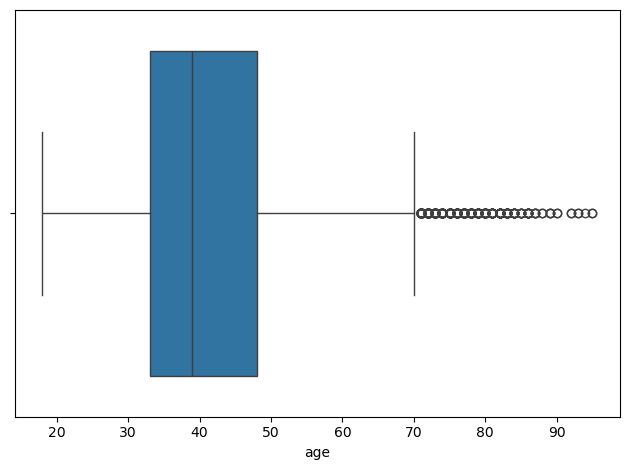

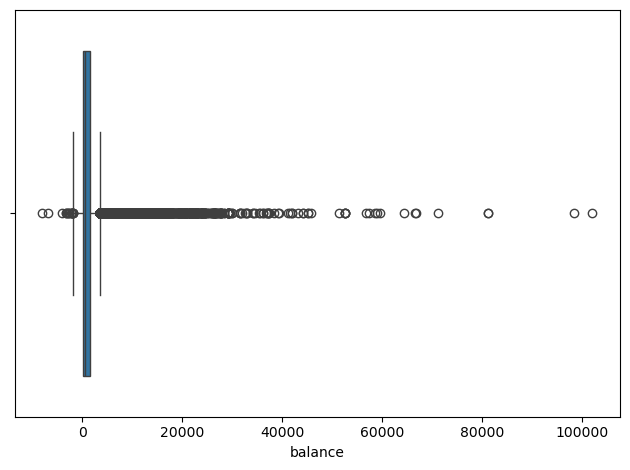

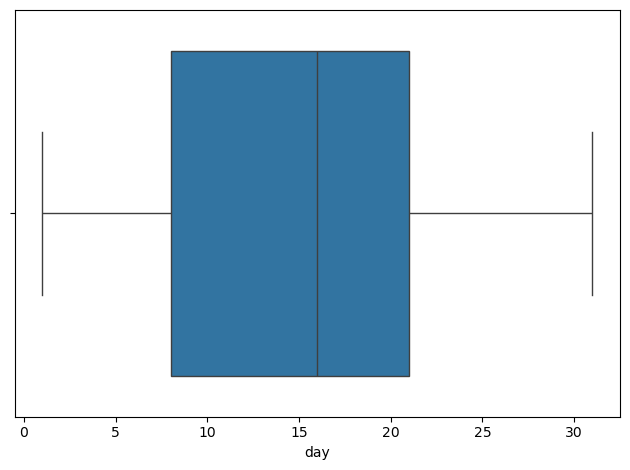

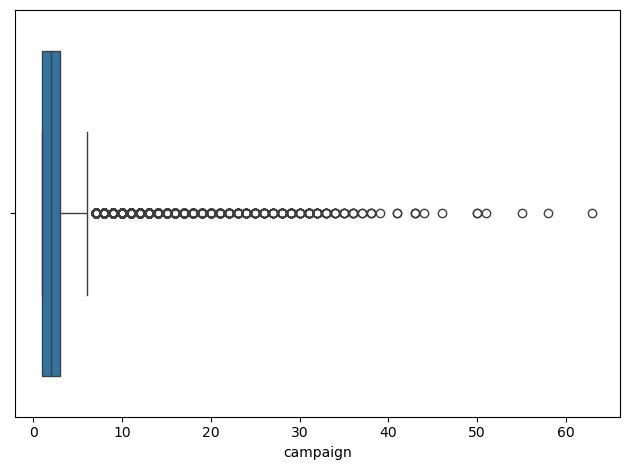

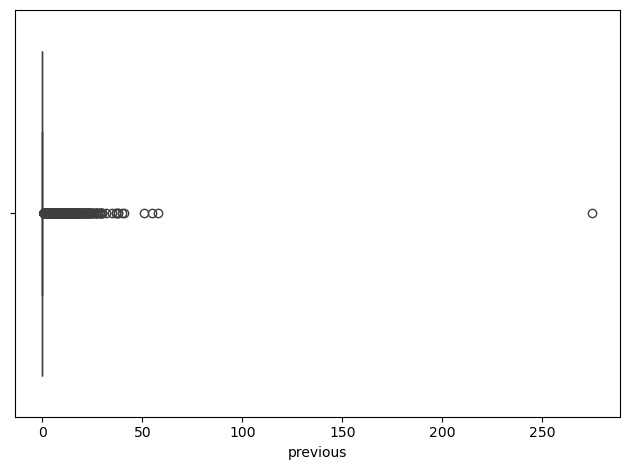

In [41]:
# check for outliers in numerical columns by plotting boxplots except "pdays"
cols = ['age', 'balance', 'day', 'campaign', 'previous']
for col in cols:
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

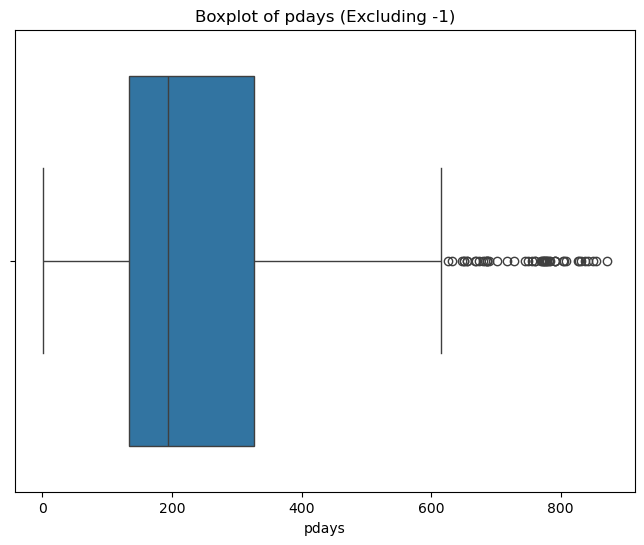

In [42]:
# Filter out -1
pdays_filtered = df[df['pdays'] >= 0]['pdays']

# Create a boxplot for the filtered pdays
plt.figure(figsize=(8, 6))
sns.boxplot(x=pdays_filtered)
plt.title('Boxplot of pdays (Excluding -1)')
plt.xlabel('pdays')
plt.show()

In [43]:
# Deal with outliers - ignore, remove or replace based on context

In [44]:
# Visualize the "unknown" value percentage of each column
unknownDF = pd.DataFrame({"Column": pd.Series(dtype="str"), "Unknown_Percentage": pd.Series(dtype="float")})
for x in df.columns:
    numberUnknown = df[x][df[x] == 'unknown'].shape[0]
    unknownProportion = numberUnknown/df.shape[0]
    # only non zero percentages are displayed
    if unknownProportion != 0:
        new_row = pd.DataFrame({"Column":[x], "Unknown_Percentage":[unknownProportion*100]})
        unknownDF = pd.concat([unknownDF, new_row], ignore_index=True)
unknownDF

,Column,Unknown_Percentage
0,job,0.637013
1,education,4.107407
2,contact,28.798301
3,poutcome,81.747805


In [45]:
df = df[df["job"] != "unknown"]

In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,unknown,no


In [47]:
# one hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'], drop_first=True)

In [48]:
df.head()

,age,balance,day,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1,0,no,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,1,-1,0,no,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,1,-1,0,no,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,1,-1,0,no,True,False,False,...,False,False,False,True,False,False,False,False,False,True
5,35,231,5,1,-1,0,no,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [49]:
y = df["y"]
X = df.drop(columns=["y"])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['log2', None]
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.9189404057749794
Testing Accuracy: 0.8941159011649477
Confusion Matrix:
[[11762   163]
 [ 1264   288]]


Preprocessing for distance based methods

In [154]:
# As poutcome has 81% unknown values, the poutcome column will be dropped
df.drop(columns = ["poutcome"], inplace = True)

In [155]:
# The columns (education and contact) will be imputated with relevant values
df.contact.value_counts()  

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [156]:
# as cellular is the form of contact with the highest value count, the "unknown" values will be imputated with "cellular"
df.loc[df['contact'] == "unknown", 'contact'] = "cellular"

In [157]:
# the "unknown" rows(0.637%) of the jobs column will be removed 
df = df[df["job"] != "unknown"]

In [158]:
df.education.value_counts() 

education
secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: count, dtype: int64

In [159]:
# as secondary is the education level with the highest value count, the "unknown" values will be imputated with "secondary"
df.loc[df['education'] == "unknown", 'education'] = "secondary"

In [160]:
# getting numerical columns
df.select_dtypes("number").columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [161]:
# getting categorical columns
df.select_dtypes("object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')

In [162]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,-1,0,no


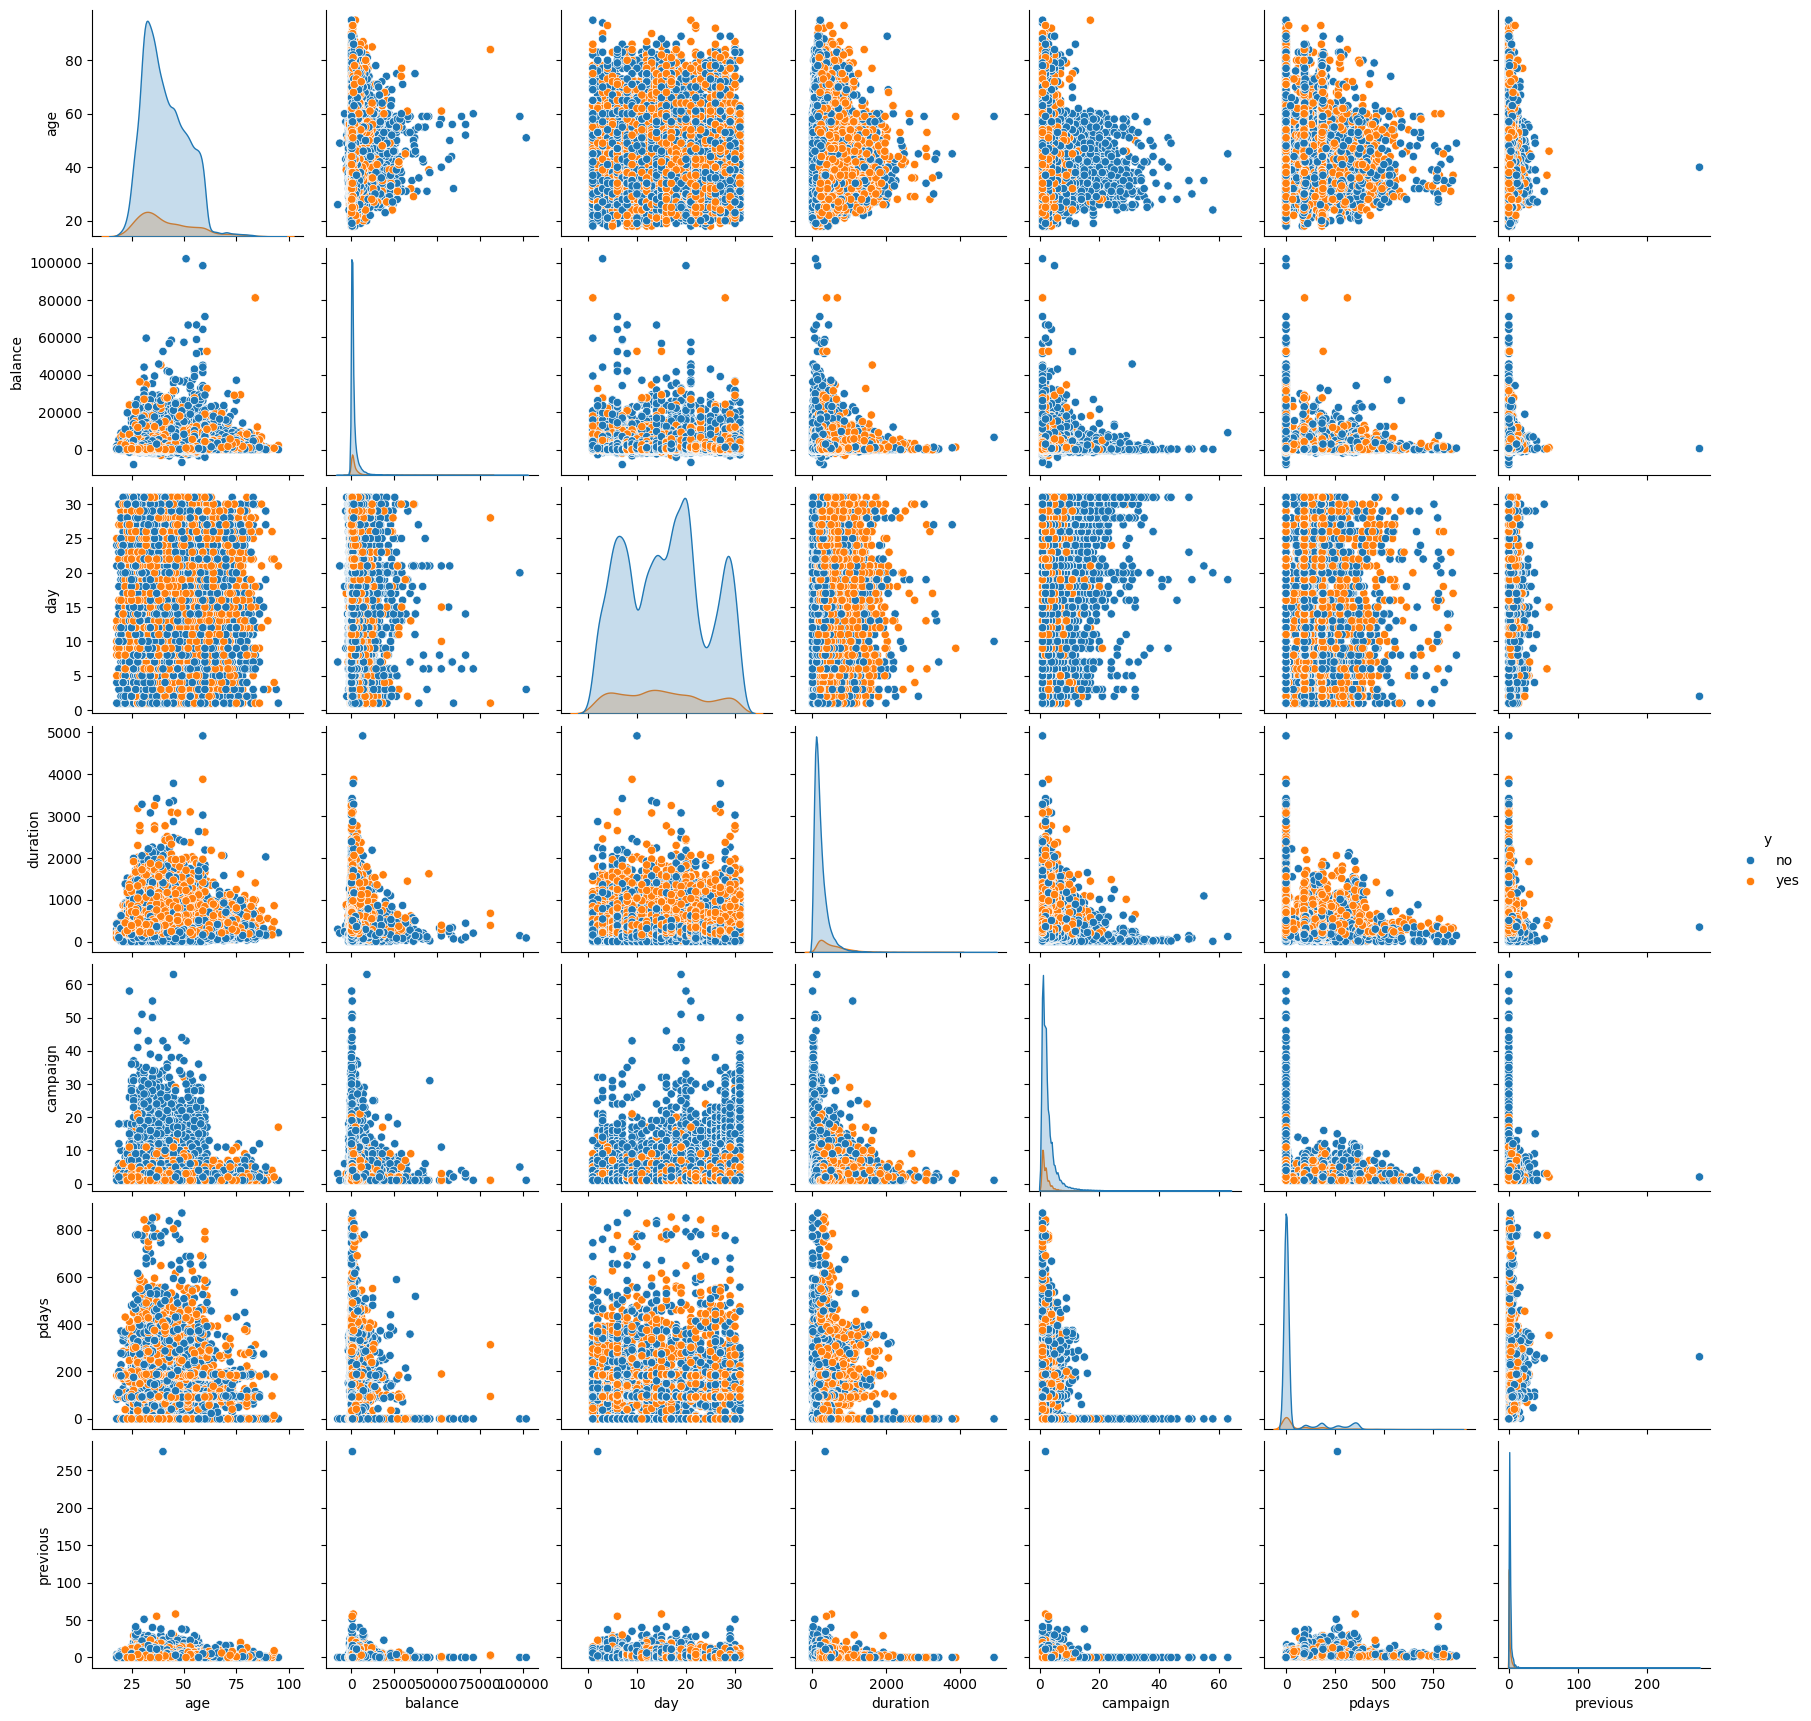

In [163]:
sns.pairplot(df, hue='y')

In [116]:
# one hot encoding
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month'], drop_first=True)

In [139]:
y = df["y"]
X = df.drop(columns=["y"])